# Pytorch Tutorial

## Getting Started

In [2]:
from __future__ import print_function
import torch

In [4]:
x = torch.empty(5)
x

tensor([-7.0454e+16,  4.5602e-41, -7.0454e+16,  4.5602e-41,  4.4842e-44])

In [5]:
x = torch.randn(3,5)
x

tensor([[-0.2868, -0.7095, -0.2244,  0.0359, -0.0446],
        [ 0.9009, -1.4887,  1.1688, -0.8644, -0.2834],
        [ 0.6291, -0.7237,  0.1425,  0.7541, -0.8514]])

In [7]:
x = torch.zeros(5, 3, dtype=torch.long)
x

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])

In [8]:
x = torch.tensor([5.5, 3])
x

tensor([5.5000, 3.0000])

In [10]:
x = x.new_ones(5, 3, dtype=torch.double)
print(x)
x = torch.randn_like(x, dtype=torch.float)    # override dtype!
x

tensor([[ 0.5359, -0.6125,  0.4776],
        [ 1.6412, -0.6522,  1.3568],
        [ 0.5305, -1.7568,  1.7467],
        [-0.2996, -0.2183, -0.9193],
        [ 1.4179, -0.1998, -0.9144]])

In [12]:
print(x.size())

torch.Size([5, 3])


In [14]:
y = torch.randn(5, 3)
print(x + y)

tensor([[-0.7118, -0.8840,  2.0376],
        [-0.6116, -1.1469,  1.6384],
        [ 0.6491, -2.3616,  2.1900],
        [-0.7521, -1.1007, -1.9134],
        [-0.2323, -0.4377,  0.5033]])


In [15]:
print(torch.add(x, y))

tensor([[-0.7118, -0.8840,  2.0376],
        [-0.6116, -1.1469,  1.6384],
        [ 0.6491, -2.3616,  2.1900],
        [-0.7521, -1.1007, -1.9134],
        [-0.2323, -0.4377,  0.5033]])


In [17]:
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

tensor([[-0.7118, -0.8840,  2.0376],
        [-0.6116, -1.1469,  1.6384],
        [ 0.6491, -2.3616,  2.1900],
        [-0.7521, -1.1007, -1.9134],
        [-0.2323, -0.4377,  0.5033]])


In [19]:
# adds x to y
y.add_(x)
print(y)

tensor([[-0.1759, -1.4965,  2.5152],
        [ 1.0296, -1.7991,  2.9952],
        [ 1.1797, -4.1185,  3.9367],
        [-1.0517, -1.3190, -2.8327],
        [ 1.1856, -0.6375, -0.4111]])


In [22]:
print(x[:, 1])

tensor([-0.6125, -0.6522, -1.7568, -0.2183, -0.1998])


**Resizing:** If you want to resize/reshape tensor, you can use `torch.view`:

In [23]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


If you have a one element tensor, use `.item()` to get the value as a Python number

In [25]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([-0.5195])
-0.5194937586784363


## Converting a Torch Tensor to a NumPy Array

In [28]:
a = torch.ones(5)
print(a)
b = a.numpy()
print(b)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]


In [29]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [31]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


## AUTOGRAD: AUTOMATIC DIFFERENTIATION

In [33]:
import torch

In [39]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [40]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


`y` was created as a result of an operation, so it has a `grad_fn`.

In [41]:
print(y.grad_fn)

In [42]:
z = y * y * 3
out = z.mean()
print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


`.requires_grad_( ... )` changes an existing Tensor’s `requires_grad` flag in-place. The input flag defaults to `False` if not given.

In [44]:
a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

False
True


Let’s backprop now. Because `out` contains a single scalar, `out.backward()` is equivalent to `out.backward(torch.tensor(1.))`.

In [45]:
out.backward()

Print gradients d(out)/dx

In [46]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


You should have got a matrix of `4.5`. Let’s call the `out` Tensor “o”. We have that $o = \frac{1}{4}\sum_i z_i$, $z_i = 3(x_i+2)^2$ and $z_i\bigr\rvert_{x_i=1} = 27$. Therefore, $\frac{\partial o}{\partial x_i} = \frac{3}{2}(x_i+2)$, hence $\frac{\partial o}{\partial x_i}\bigr\rvert_{x_i=1} = \frac{9}{2} = 4.5$.

Mathematically, if you have a vector valued function $\vec{y}=f(\vec{x})$, then the gradient of $\vec{y}$  with respect to $\vec{x}$  is a Jacobian matrix:
$$\begin{split}J=\left(\begin{array}{ccc}
 \frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{1}}{\partial x_{n}}\\
 \vdots & \ddots & \vdots\\
 \frac{\partial y_{m}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}
 \end{array}\right)\end{split}$$

Generally speaking, `torch.autograd` is an engine for computing vector-Jacobian product. That is, given any vector $v=\left(\begin{array}{cccc} v_{1} & v_{2} & \cdots & v_{m}\end{array}\right)^{T}$, compute the product $v^{T}\cdot J$. If $v$ happens to be the gradient of a scalar function $l=g\left(\vec{y}\right)$, that is, $v=\left(\begin{array}{ccc}\frac{\partial l}{\partial y_{1}} & \cdots & \frac{\partial l}{\partial y_{m}}\end{array}\right)^{T}$, then by the chain rule, the vector-Jacobian product would be the gradient of $l$ with respect to $\vec{x}$ :
$$\begin{split}J^{T}\cdot v=\left(\begin{array}{ccc}
 \frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{1}}\\
 \vdots & \ddots & \vdots\\
 \frac{\partial y_{1}}{\partial x_{n}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}
 \end{array}\right)\left(\begin{array}{c}
 \frac{\partial l}{\partial y_{1}}\\
 \vdots\\
 \frac{\partial l}{\partial y_{m}}
 \end{array}\right)=\left(\begin{array}{c}
 \frac{\partial l}{\partial x_{1}}\\
 \vdots\\
 \frac{\partial l}{\partial x_{n}}
 \end{array}\right)\end{split}$$
 (Note that $v^T⋅J$ gives a row vector which can be treated as a column vector by taking $J^T⋅v$.)

This characteristic of vector-Jacobian product makes it very convenient to feed external gradients into a model that has non-scalar output.

Now let’s take a look at an example of vector-Jacobian product:

In [4]:
x = torch.randn(3, requires_grad=True)
y = x * 2
while y.data.norm() < 1000: # y.data 的 2 范数
    y = y * 2
print(y)

tensor([ 243.8343, 1859.5187,  433.1491], grad_fn=<MulBackward0>)


Now in this case `y` is no longer a scalar. `torch.autograd` could not compute the full Jacobian directly, but if we just want the vector-Jacobian product, simply pass the vector to `backward` as argument:

In [5]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)
print(x.grad)

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


In [7]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

True
True
False


## NEURAL NETWORKS

Neural networks can be constructed using the `torch.nn` package.

Now that you had a glimpse of `autograd`, `nn` depends on `autograd` to define models and differentiate them. An `nn.Module` contains layers, and a method `forward(input)`that returns the `output`.

For example, look at this network that classifies digit images:

![fsd](https://pytorch.org/tutorials/_images/mnist.png)

### Define the network

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):

    def __init__(self):
        super(Net,self).__init__()
        # 1 input image channel, 6 output channels, 3x3 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 6 * 6, 120)  # 6*6 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10) 

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


You just have to define the `forward` function, and the `backward` function (where gradients are computed) is automatically defined for you using `autograd`. You can use any of the Tensor operations in the `forward` function.

The learnable parameters of a model are returned by `net.parameters()`

In [12]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 3, 3])


Let try a random 32x32 input. Note: expected input size of this net (LeNet) is 32x32. To use this net on MNIST dataset, please resize the images from the dataset to 32x32.

In [15]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[ 0.0251,  0.0173,  0.0737, -0.0636,  0.0445, -0.0363,  0.0201,  0.0686,
         -0.1066,  0.0272]], grad_fn=<AddmmBackward>)


Zero the gradient buffers of all parameters and backprops with random gradients:

In [ ]:
net.zero_grad()
out.backward(torch.randn(1, 10))

For example, `nn.Conv2d` will take in a 4D Tensor of `nSamples x nChannels x Height x Width`.

If you have a single sample, just use `input.unsqueeze(0)` to add a fake batch dimension.

Recap:
- `torch.Tensor` - A multi-dimensional array with support for autograd operations like `backward()`. Also holds the gradient w.r.t. the tensor.
- `nn.Module` - Neural network module. Convenient way of encapsulating parameters, with helpers for moving them to GPU, exporting, loading, etc.
- `nn.Parameter` - A kind of Tensor, that is automatically registered as a parameter when assigned as an attribute to a `Module`.
- `autograd.Function` - Implements forward and backward definitions of an `autograd` operation. Every `Tensor` operation creates at least a single `Function` node that connects to functions that created a `Tensor` and encodes its history.

### Loss Function
A loss function takes the (output, target) pair of inputs, and computes a value that estimates how far away the output is from the target.

In [20]:
output = net(input)
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()
loss = criterion(output, target)
print(loss)

tensor([[ 0.0251,  0.0173,  0.0737, -0.0636,  0.0445, -0.0363,  0.0201,  0.0686,
         -0.1066,  0.0272]], grad_fn=<AddmmBackward>)
tensor([[ 0.9742,  0.1312, -0.3844, -0.8399, -0.9474, -0.1069,  0.2654, -0.1648,
          0.0786, -1.5961]])
tensor(0.5499, grad_fn=<MseLossBackward>)


Now, if you follow `loss` in the backward direction, using its `.grad_fn` attribute, you will see a graph of computations that looks like this:
```
input -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d
      -> view -> linear -> relu -> linear -> relu -> linear
      -> MSELoss
      -> loss
```

In [21]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

### Backprop
To backpropagate the error all we have to do is to `loss.backward()`. You need to clear the existing gradients though, else gradients will be accumulated to existing gradients.

In [22]:
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([-0.0092,  0.0072, -0.0021, -0.0014,  0.0019, -0.0038])


### Update the weights
The simplest update rule used in practice is the Stochastic Gradient Descent (SGD):

`weight = weight - learning_rate * gradient`

In [23]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

However, as you use neural networks, you want to use various different update rules such as SGD, Nesterov-SGD, Adam, RMSProp, etc. To enable this, we built a small package: `torch.optim` that implements all these methods. Using it is very simple:

In [25]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

## TRAINING A CLASSIFIER

### What about data?

Generally, when you have to deal with image, text, audio or video data, you can use standard python packages that load data into a numpy array. Then you can convert this array into a `torch.*Tensor`.

- For images, packages such as `Pillow`, `OpenCV` are useful
- For audio, packages such as `scipy` and `librosa`
- For text, either raw Python or Cython based loading, or NLTK and SpaCy are useful

Specifically for vision, we have created a package called `torchvision`, that has data loaders for common datasets such as Imagenet, CIFAR10, MNIST, etc. and data transformers for images, viz., `torchvision.datasets` and `torch.utils.data.DataLoader`.

For this tutorial, we will use the CIFAR10 dataset. It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.

![](https://pytorch.org/tutorials/_images/cifar10.png)

### Training an image classifier

We will do the following steps in order:

1. Load and normalizing the CIFAR10 training and test datasets `using torchvision`
2. Define a Convolutional Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data

#### 1. Loading and normalizing CIFAR10

In [27]:
import torch
import torchvision
import torchvision.transforms as transforms

The output of torchvision datasets are PILImage images of range [0, 1]. We transform them to Tensors of normalized range [-1, 1]. .. note:
```
If running on Windows and you get a BrokenPipeError, try setting
the num_worker of torch.utils.data.DataLoader() to 0.
```

Note: transforms.Normalize(mean,std)

z-score 规范化(零均值规范化)
$$
input = \frac{input - mean}{std}
$$

In [28]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100.0%

Files already downloaded and verified


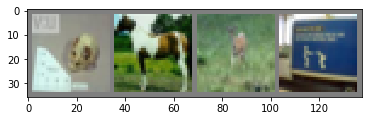

  cat horse  deer truck


In [30]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next() # image size(4, 1, 32, 32) nSamples nChannels Height Width

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

#### 2. Define a` Convolutional Neural Network

In [40]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    
net = Net()

#### 3. Define a Loss function and optimizer
Let’s use a Classification Cross-Entropy loss and SGD with momentum.

In [41]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

#### 4. Train the network
This is when things start to get interesting. We simply have to loop over our data iterator, and feed the inputs to the network and optimize.

In [42]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.242
[1,  4000] loss: 1.987
[1,  6000] loss: 1.758
[1,  8000] loss: 1.639
[1, 10000] loss: 1.543
[1, 12000] loss: 1.508
[2,  2000] loss: 1.426
[2,  4000] loss: 1.390
[2,  6000] loss: 1.363
[2,  8000] loss: 1.351
[2, 10000] loss: 1.335
[2, 12000] loss: 1.299
Finished Training


#### 5. Test the network on the test data
We have trained the network for 2 passes over the training dataset. But we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network outputs, and checking it against the ground-truth. If the prediction is correct, we add the sample to the list of correct predictions.

Okay, first step. Let us display an image from the test set to get familiar.

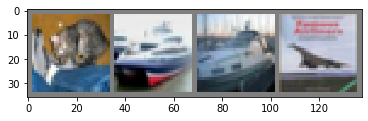

GroundTruth:    cat  ship  ship plane


In [43]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

Okay, now let us see what the neural network thinks these examples above are:

In [44]:
outputs = net(images)

The outputs are energies for the 10 classes. The higher the energy for a class, the more the network thinks that the image is of the particular class. So, let’s get the index of the highest energy:

In [45]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship  ship


Let us look at how the network performs on the whole dataset.

In [46]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 53 %


In [47]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 57 %
Accuracy of   car : 67 %
Accuracy of  bird : 22 %
Accuracy of   cat : 46 %
Accuracy of  deer : 61 %
Accuracy of   dog : 28 %
Accuracy of  frog : 53 %
Accuracy of horse : 65 %
Accuracy of  ship : 79 %
Accuracy of truck : 53 %


### Training on GPU

```python
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

net.to(device)

inputs, labels = data[0].to(device), data[1].to(device)
```